In [62]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import os
from pathlib import Path
from skimage.data import checkerboard

In [63]:
from CV.Vision import draw_bbox, draw_corners, pieces_number_BGR

# ChessReD

#### Read annotations

In [64]:
with open('DataSet/ChessReD/original/annotations.json', 'r') as f:
    CRD_json = json.load(f)

In [65]:
CRD_pieces = CRD_json['annotations']['pieces']
CRD_corners = CRD_json['annotations']['corners']
CRD_images = CRD_json['images']

In [67]:
CRD_pieces[0]

{'image_id': 0,
 'category_id': 7,
 'chessboard_position': 'a8',
 'id': 0,
 'bbox': [510.34, 963.65, 155.75, 186.14]}

In [27]:
CRD_corners[-1]

{'image_id': 10799,
 'corners': {'top_right': [2509.1, 1823.6],
  'bottom_right': [594.51, 2092.73],
  'top_left': [2005.33, 778.48],
  'bottom_left': [515.43, 938.19]},
 'id': 225881}

In [73]:
CRD_images[103]

{'file_name': 'G001_IMG000.jpg',
 'path': 'images/1/G001_IMG000.jpg',
 'camera': 'Huawei P40 pro',
 'height': 3072,
 'width': 3072,
 'game_id': 1,
 'move_id': 0,
 'id': 103}

#### NON/EXIST layout preprocessing

In [68]:
empty_bbox = []
exist_bbox = []
for pieces_on_image in CRD_pieces:
    image_id = pieces_on_image['image_id']
    file_name = CRD_images[image_id]['file_name'].strip('jpg')+'txt'
    width = CRD_images[image_id]['width']
    height = CRD_images[image_id]['height']

    resize_pieces = []
    if not ('bbox' in pieces_on_image):
        empty_bbox.append([pieces_on_image['id'], pieces_on_image['image_id']])
    else:
        exist_bbox.append([pieces_on_image['id'], pieces_on_image['image_id']])

In [69]:
empty_image = set()
for empty in empty_bbox:
    if not empty[1] in empty_image:
        empty_image.add(empty[1])

exist_image = set()
for empty in exist_bbox:
    if not empty[1] in exist_image:
        exist_image.add(empty[1])

In [70]:
empty_image

{103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269

#### Non layout images save

In [16]:
for id in list(empty_image):
    img = cv2.imread('DataSet/ChessReD/original/' + CRD_images[id]['path'])
    img = cv2.resize(img, (640, 640))
    cv2.imwrite('DataSet/ChessReD/non_layout_images/' + CRD_images[id]['file_name'], img)

G001_IMG000.jpg
G001_IMG001.jpg
G001_IMG002.jpg
G001_IMG003.jpg
G001_IMG004.jpg
G001_IMG005.jpg
G001_IMG006.jpg
G001_IMG007.jpg
G001_IMG008.jpg
G001_IMG009.jpg
G001_IMG010.jpg
G001_IMG011.jpg
G001_IMG012.jpg
G001_IMG013.jpg
G001_IMG014.jpg
G001_IMG015.jpg
G001_IMG016.jpg
G001_IMG017.jpg
G001_IMG018.jpg
G001_IMG019.jpg
G001_IMG020.jpg
G001_IMG021.jpg
G001_IMG022.jpg
G001_IMG023.jpg
G001_IMG024.jpg
G001_IMG025.jpg
G001_IMG026.jpg
G001_IMG027.jpg
G001_IMG028.jpg
G001_IMG029.jpg
G001_IMG030.jpg
G001_IMG031.jpg
G001_IMG032.jpg
G001_IMG033.jpg
G001_IMG034.jpg
G001_IMG035.jpg
G001_IMG036.jpg
G001_IMG037.jpg
G001_IMG038.jpg
G001_IMG039.jpg
G001_IMG040.jpg
G001_IMG041.jpg
G001_IMG042.jpg
G001_IMG043.jpg
G001_IMG044.jpg
G001_IMG045.jpg
G001_IMG046.jpg
G001_IMG047.jpg
G001_IMG048.jpg
G001_IMG049.jpg
G001_IMG050.jpg
G001_IMG051.jpg
G001_IMG052.jpg
G001_IMG053.jpg
G001_IMG054.jpg
G001_IMG055.jpg
G001_IMG056.jpg
G001_IMG057.jpg
G001_IMG058.jpg
G001_IMG059.jpg
G001_IMG060.jpg
G001_IMG061.jpg
G001_IMG

#### Separation: Train, Val, Test 

In [10]:
train = set()
val = set()
test = set()

np.random.seed(42)
shufle_exist_image = list(exist_image)
np.random.shuffle(shufle_exist_image)

c = 1
for i in shufle_exist_image:
    if c <= len(exist_image) * 0.7:
        train.add(i)
    elif len(exist_image) * 0.7 < c <= len(exist_image) * 0.85:
        val.add(i)
    else:
        test.add(i)
    c += 1

In [11]:
len(train) + len(val) + len(test)

2078

#### Save PIECES annotations

In [29]:
for pieces_on_image in CRD_pieces:
    image_id = pieces_on_image['image_id']
    file_name = CRD_images[image_id]['file_name'].strip('jpg')+'txt'
    width = CRD_images[image_id]['width']
    height = CRD_images[image_id]['height']

    resize_pieces = []
    
    if 'bbox' in pieces_on_image:

        resize_x = (pieces_on_image['bbox'][0] + pieces_on_image['bbox'][2]/2)/width
        resize_y = (pieces_on_image['bbox'][1] + pieces_on_image['bbox'][3]/2)/height
        resize_width  = pieces_on_image['bbox'][2]/width
        resize_height = pieces_on_image['bbox'][3]/height

        bbox = [resize_x, resize_y, resize_width, resize_height]
        category = pieces_on_image['category_id']

        if image_id in train:
            with open('DataSet/ChessReD/pieces/train/'+file_name,'a') as annotations:
                annotations.write(' '.join(list(map(str,([category] + bbox))))+'\n')

        if image_id in val:
            with open('DataSet/ChessReD/pieces/val/'+file_name,'a') as annotations:
                annotations.write(' '.join(list(map(str,([category] + bbox))))+'\n')

        if image_id in test:
            with open('DataSet/ChessReD/pieces/test/'+file_name,'a') as annotations:
                annotations.write(' '.join(list(map(str,([category] + bbox))))+'\n')


#### Save CORNERS annotations

In [33]:
for corners_on_image in CRD_corners:
    image_id = corners_on_image['image_id']
    file_name = CRD_images[image_id]['file_name'].strip('jpg')+'txt'
    width = CRD_images[image_id]['width']
    height = CRD_images[image_id]['height']

    resize_corners = []
    for coord in corners_on_image['corners'].values():
        resize_corners.append(coord[0]/width)
        resize_corners.append(coord[1]/height)

    resize_x = (max(resize_corners[::2]) + min(resize_corners[::2])) /2
    resize_y = (max(resize_corners[1::2])+ min(resize_corners[1::2]))/2
    resize_width  = (max(resize_corners[::2]) - min(resize_corners[::2])) + 0.075
    resize_height = (max(resize_corners[1::2])- min(resize_corners[1::2]))+ 0.075

    bbox = [resize_x, resize_y, resize_width, resize_height]

    if (bbox[0]+bbox[2]/2 > 1) or (bbox[1]+bbox[3]/2 > 1) or (bbox[0]-bbox[2]/2 < 0) or (bbox[1]-bbox[3]/2 < 0):
        print('wrong')

    new_resize_corners = []
    for i in range(len(resize_corners)):
        new_resize_corners.append(resize_corners[i])
        if i % 2 == 1:
            new_resize_corners.append(2.0)


    if image_id in train:
        with open('DataSet/ChessReD/corners/train/'+file_name,'a') as annotations:
            annotations.write(' '.join(list(map(str,([0] + bbox + resize_corners))))+'\n')

    if image_id in val:
        with open('DataSet/ChessReD/corners/val/'+file_name,'a') as annotations:
            annotations.write(' '.join(list(map(str,([0] + bbox + resize_corners))))+'\n')

    if image_id in test:
        with open('DataSet/ChessReD/corners/test/'+file_name,'a') as annotations:
            annotations.write(' '.join(list(map(str,([0] + bbox + resize_corners))))+'\n')

    

#### Save RESIZE images

In [14]:
image_directory = 'resize_images'
for image in CRD_images:
    if image['id'] in train:
        img = cv2.imread('DataSet/ChessReD/original/chessred2k/' + image['path'])
        img = cv2.resize(img, (640, 640))
        cv2.imwrite('DataSet/ChessReD/'+image_directory+'/train/' + image['file_name'], img)

    if image['id'] in val:
        img = cv2.imread('DataSet/ChessReD/original/chessred2k/' + image['path'])
        img = cv2.resize(img, (640, 640))
        cv2.imwrite('DataSet/ChessReD/'+image_directory+'/val/' + image['file_name'], img)

    if image['id'] in test:
        img = cv2.imread('DataSet/ChessReD/original/chessred2k/' + image['path'])
        img = cv2.resize(img, (640, 640))
        cv2.imwrite('DataSet/ChessReD/'+image_directory+'/test/' + image['file_name'], img)

DataSet/ChessReD/resize_images/train/G000_IMG000.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG002.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG003.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG005.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG006.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG007.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG009.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG010.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG012.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG015.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG018.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG023.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG024.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG025.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG027.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG028.jpg
True
DataSet/ChessReD/resize_images/train/G000_IMG029.jpg
True
DataSet/ChessR

#### Save RESIZE images from ZIP

In [10]:
CRD_images[0]

{'file_name': 'G000_IMG000.jpg',
 'path': 'images/0/G000_IMG000.jpg',
 'camera': 'Huawei P40 pro',
 'height': 3072,
 'width': 3072,
 'game_id': 0,
 'move_id': 0,
 'id': 0}

#### Delete PIECES annotations

In [20]:
p = Path("DataSet/ChessReD/pieces")
for x in p.rglob("*.txt"):
    os.remove(x)

#### Delete CORNERS annotations

In [32]:
p = Path("DataSet/ChessReD/corners")
for x in p.rglob("*.txt"):
    os.remove(x)

#### Over

In [6]:
CRD_images[0]

{'file_name': 'G000_IMG000.jpg',
 'path': 'images/0/G000_IMG000.jpg',
 'camera': 'Huawei P40 pro',
 'height': 3072,
 'width': 3072,
 'game_id': 0,
 'move_id': 0,
 'id': 0}

In [5]:
CRD_corners[0]

{'image_id': 0,
 'corners': {'bottom_right': [2610.3, 1560.9],
  'top_right': [1772.23, 638.59],
  'top_left': [488.7, 1078.7],
  'bottom_left': [1063.3, 2304.1]},
 'id': 223804}

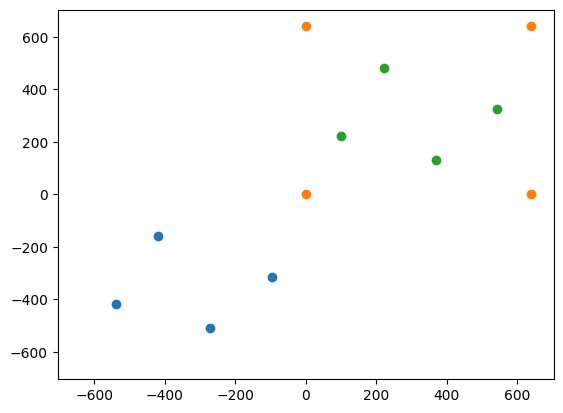

# Synthetic

In [12]:
from ultralytics import YOLO

In [17]:
CRD_corners[0]

{'image_id': 0,
 'corners': {'bottom_right': [2610.3, 1560.9],
  'top_right': [1772.23, 638.59],
  'top_left': [488.7, 1078.7],
  'bottom_left': [1063.3, 2304.1]},
 'id': 223804}


0: 640x640 8 white-pawns, 2 white-rooks, 2 white-knights, 2 white-bishops, 1 white-queen, 1 white-king, 8 black-pawns, 2 black-rooks, 2 black-knights, 2 black-bishops, 1 black-queen, 1 black-king, 69.1ms
Speed: 6.7ms preprocess, 69.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
[[     191.15      201.76      34.325      63.401]]
[[     237.33      150.73      28.534       47.97]]
[[     525.38      249.86      32.554      48.712]]
[[     418.08      485.77      35.572      49.351]]
[[     494.62      313.72      40.475      66.958]]
[[     141.86      266.87      32.101      52.488]]
[[     363.55      462.65      29.767      41.347]]
[[     439.13      436.62      34.908      49.318]]
[[     318.02      335.91      32.003      52.257]]
[[     462.15      269.11      27.087      39.369]]
[[     540.41      220.09      30.457      43.345]]
[[     385.23      419.16      30.277      40.759]]
[[     157.83      325.28      28.474      40.981]]
[[     231.87      227

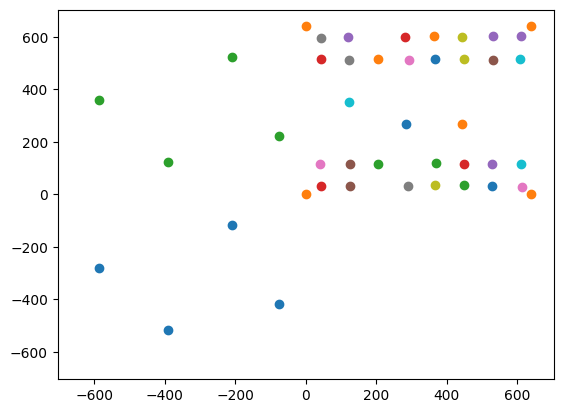

In [61]:
corners_dict = CRD_corners[4]
image_id = corners_dict['image_id']

corect_corners = lambda xy: np.array([int(xy[0]), int(xy[1])])

br = corect_corners(corners_dict['corners']['bottom_right'])
tr = corect_corners(corners_dict['corners']['top_right'])
tl = corect_corners(corners_dict['corners']['top_left'])
bl = corect_corners(corners_dict['corners']['bottom_left'])

img = cv2.imread('DataSet/ChessReD/original/chessred2k/'+CRD_images[image_id]['path'])


w, h = img.shape[0], img.shape[1]

def resize_xy(xy_list:list, w:int, h:int, wf, hf):
    ans = []
    for xy in xy_list:
        ans.append([int(xy[0]*(wf/w)), int(xy[1]*(hf/h))])
    ans = np.array(ans, dtype=np.float32)
    return ans


src = resize_xy([br, tr, tl, bl], w, h, 640, 640)

w, h = 640, 640

img = cv2.resize(img, (640, 640))

dst = np.array(
    [[w, h],
     [w, 0], 
     [0, 0], 
     [0, h]],
    dtype=np.float32)

dst_king =  np.array(
    [[15/16*w, 15/16*h],
     [15/16*w, 1/16*h], 
     [1/16*w, 1/16*h], 
     [1/16*w, 15/16*h]],
    dtype=np.float32)


m_invervse = cv2.getPerspectiveTransform(dst, src)
m_direct = cv2.getPerspectiveTransform(src, dst)

invervse = cv2.perspectiveTransform(dst[None, :, :], m_invervse)
direct   = cv2.perspectiveTransform(src[None, :, :], m_direct)

x_invervse, y_invervse = invervse.transpose() - w
x_direct, y_direct = direct.transpose()
x_src, y_src = src.transpose()
x_src = x_src - w


plt.ylim((-h*1.1,h*1.1))
plt.xlim((-w*1.1,w*1.1))

plt.scatter(x_invervse, y_invervse)
plt.scatter(x_direct, y_direct)
plt.scatter(x_src, y_src)

model = YOLO('YOLOv8/best/ChessPieces/weights/best.pt')
result = model.predict(img)

img1 = cv2.warpPerspective(img, m_direct,(h, w))

dict_pieces_position = {
    1: [],
    5: [],
    7: [],
    11: [],
}

dict_corner = {
    'TR': [],
    'BR': [],
    'BL': [],
    'TL': [],
}

for r in result:
    boxes = r.boxes
    for box in boxes:
        
        print(box.xywh.cpu().numpy())
        b = box.xywh[0].cpu().numpy()
        c = int(box.cls.cpu().numpy())

        x, y = int(b[0]), int(b[1]+b[3]*2.75/8)

        if c in dict_pieces_position:
            dict_pieces_position[c].append(np.array([x, y]))



l1 = np.linalg.norm(dict_pieces_position[1][0] - dict_pieces_position[5][0])
l2 = np.linalg.norm(dict_pieces_position[1][1] - dict_pieces_position[5][0])
# print(np.linalg.norm(dict_pieces_position[1][0] - dict_pieces_position[1][1]))
if l1 > l2:
    dict_corner['BL'] = dict_pieces_position[1][0]
    dict_corner['BR'] = dict_pieces_position[1][1]
else:
    dict_corner['BL'] = dict_pieces_position[1][1]
    dict_corner['BR'] = dict_pieces_position[1][0]    


l1 = np.linalg.norm(dict_pieces_position[7][0] - dict_pieces_position[11][0])
l2 = np.linalg.norm(dict_pieces_position[7][1] - dict_pieces_position[11][0])
# print(np.linalg.norm(dict_pieces_position[1][0] - dict_pieces_position[1][1]))
if l1 > l2:
    dict_corner['TL'] = dict_pieces_position[7][0]
    dict_corner['TR'] = dict_pieces_position[7][1]
else:
    dict_corner['TL'] = dict_pieces_position[7][1]
    dict_corner['TR'] = dict_pieces_position[7][0]    




src_king = np.array(
    [dict_corner['BR'],
     dict_corner['TR'], 
     dict_corner['TL'], 
     dict_corner['BL']],
    dtype=np.float32)

m_direct_king = cv2.getPerspectiveTransform(src_king, dst_king)
img_king = cv2.warpPerspective(img, m_direct_king,(h, w))




for r in result:
    boxes = r.boxes
    for box in boxes:
        
        b = box.xywh[0].cpu().numpy()
        c = box.cls.cpu().numpy()
        x, y = int(b[0]), int(b[1]+b[3]*5/16)

        piece_direct = m_direct @ np.array([x, y, 1])
        piece_direct = piece_direct / piece_direct[2]
        center = list(map(int, piece_direct[:2]))

        piece_direct_king = m_direct_king @ np.array([x, y, 1])
        piece_direct_king = piece_direct_king / piece_direct_king[2]
        center_king = list(map(int, piece_direct_king[:2]))


        plt.scatter(*center)
        img = cv2.circle(img, (x, y), 3, pieces_number_BGR[int(c)], -1)
        img1 = cv2.circle(img1, center, 6, pieces_number_BGR[int(c)], -1)
        img_king = cv2.circle(img_king, center_king, 6, pieces_number_BGR[int(c)], -1)

for i in range(9):
    img1     = cv2.line(img1,     (0, int(i/8*h)), (w, int(i/8*h)), (0, 0, 255), 3) 
    img_king = cv2.line(img_king, (0, int(i/8*h)), (w, int(i/8*h)), (0, 0, 255), 3) 

for i in range(9):
    img1     = cv2.line(img1,     (int(i/8*w), 0), (int(i/8*w), h), (0, 0, 255), 3) 
    img_king = cv2.line(img_king, (int(i/8*w), 0), (int(i/8*w), h), (0, 0, 255), 3) 

cv2.imshow('Original Image', img)
cv2.imshow('Transformed Image', img1)
cv2.imshow('Transformed King', img_king)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

# Green Field Detection

# Green Field Real Game

# Noise Chess Detection

# Video Chess Detection